In [1]:
import numpy as np
import pandas as pd
import math

# CE677B, Home assignment 2:

## Shashank Karyakarte

## Roll No- 20103107

### Estimation of state vector at t=0 by least squares technique.

*******


## Phased adjustments using Observation equation method:

In [2]:
import sympy as sym
sym.init_printing()
from sympy import *

In [3]:
x, y, z, tau = sym.symbols('x y z tau')

### Above data is inputed in following lists

In [4]:
X= [9839039.315,-2218337.206,22396470.86,14594983.7,6688151.999,25216638.38]
Y= [-21709697.32,-25844942.85,4039981.595,-5903658.34,-14201808.09,-4812327.964]
Z= [11040129.19,-5411264.815,-13885041.35,-21432904.47,21156337.03,6866027.89]
D1=[21634163,22234109.9,21715363.66,22604581.34,24983865.02,22966617.25]



## Phased adjustments using Observation equation method:

### Mathematical model for phased adjustments:

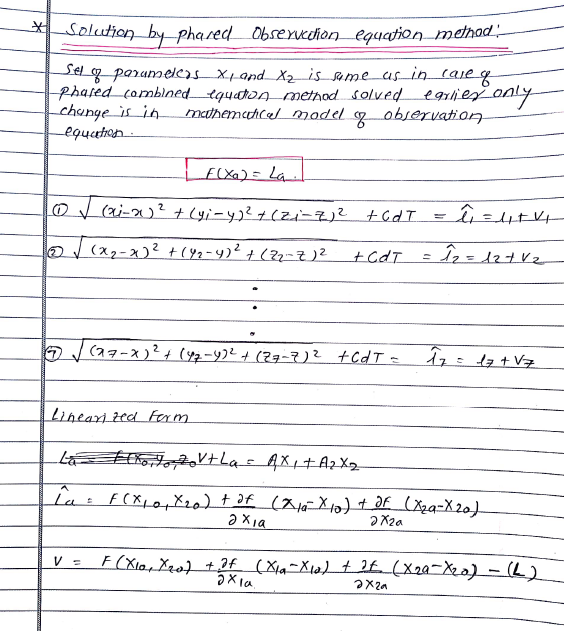

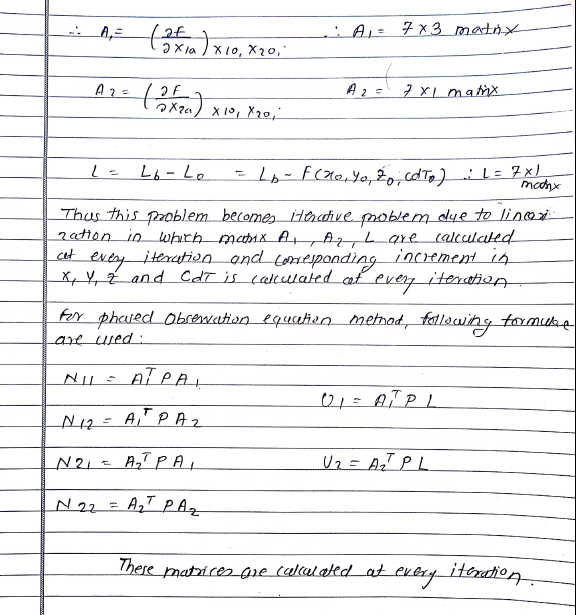

### Above model is written in the form of sympy expression for calculation purpose.

In [5]:
d1=(((x-X[0])**2)+((y-Y[0])**2)+((z-Z[0])**2))**0.5 + (tau)
d2=(((x-X[1])**2)+((y-Y[1])**2)+((z-Z[1])**2))**0.5 + (tau)
d3=(((x-X[2])**2)+((y-Y[2])**2)+((z-Z[2])**2))**0.5 + (tau)
d4=(((x-X[3])**2)+((y-Y[3])**2)+((z-Z[3])**2))**0.5 + (tau)
d5=(((x-X[4])**2)+((y-Y[4])**2)+((z-Z[4])**2))**0.5 + (tau)
d6=(((x-X[5])**2)+((y-Y[5])**2)+((z-Z[5])**2))**0.5 + (tau)


In [6]:
Lb= np.zeros((6,1))
for i in range(len(D1)):
    Lb[i][0]=D1[i]
Lb=np.matrix(Lb)
Lb

matrix([[21634163.  ],
        [22234109.9 ],
        [21715363.66],
        [22604581.34],
        [24983865.02],
        [22966617.25]])

In [7]:
P=np.zeros((6,6))

for i in range(0,6):
    P[i][i]=25
    
    
#P=np.matrix(P)

P

array([[25.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 25.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 25.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 25.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 25.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 25.]])

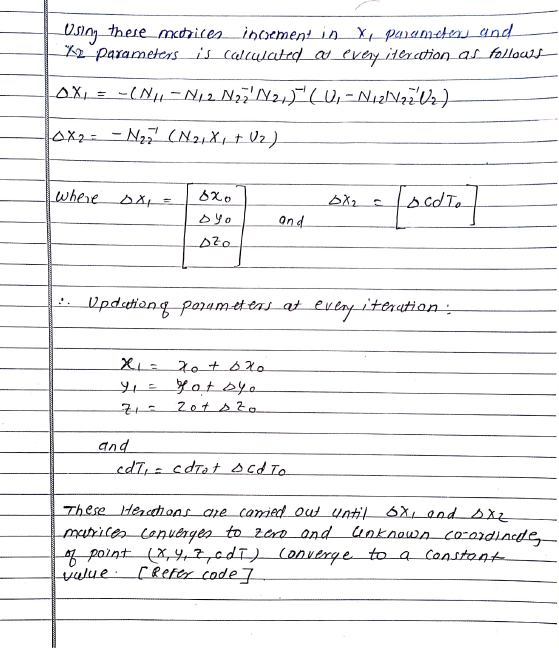

### Folowing program is thus written as described above that takes initial estimates of parameters, weight matrix, matrix of observations  as input argument, then do user specified number of iterations and update value of first and second set of parameters at every iteration and finally returns conveerged value of parameters estimates as output:

In [8]:
def Iterative_adjustment_phased_observations(xo,yo,zo,Lb,CE0):
    for i in range(0,15):
        Lo=np.matrix([[d1.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d2.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d3.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d4.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d5.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d6.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])]])
                      
                     
        #print('Lo  matrix is')
        #print(Lo)

        A=np.matrix([[sym.diff(d1,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d1,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d1,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d1,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d2,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d2,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d2,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d2,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d3,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d3,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d3,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d3,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d4,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d4,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d4,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d4,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d5,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d5,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d5,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d5,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d6,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d6,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d6,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d6,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])]])
                   
        #print('A  matrix is')
        #print(A)
        L=-1*(Lb-Lo)
        #print('L matrix is')
        #print(L)

        A1=np.zeros((6,3))

        for ii in range(A.shape[0]):
            A1[ii][0]=float(A[ii,0]);
            A1[ii][1]=float(A[ii,1]);
            A1[ii][2]=float(A[ii,2]);
        A1=np.matrix(A1)
        ii=0
        #print('A1  matrix is')
        #print(A1)

        A2=np.zeros((6,1))
        for j in range(A.shape[0]):
            A2[j][0]=float(A[j,3]);
        A2=np.matrix(A2)
        j=0
        #print('A2  matrix is')
        #print(A2)

        N11= (A1.T)*P*A1
        N11= Matrix(N11)

        N12= (A1.T)*P*A2
        N12= Matrix(N12)

        N21= (A2.T)*P*A1
        N21= Matrix(N21)

        N22= (A2.T)*P*A2
        N22= Matrix(N22)

        U1= (A1.T)*P*L
        U2= (A2.T)*P*L


        Deltx1=-1*((N11- (N12*(N22**-1)*N21))**(-1))*(U1-(N12*(N22**-1)*U2))
        #print(Deltx1)

        Deltx2= -1*((N22**-1)*(N21*Deltx1+U2))
            #print('Value of Deltax mateix is')
        #print(Deltx2)
        xo=Deltx1[0,0]+xo
        print('New value of xo in {}th iteration is'.format(i))
        print(xo)
        print('New value of yo in {}th iteration is'.format(i))
        yo=Deltx1[1,0]+yo
        print(yo)
        print('New value of zo in {}th iteration is'.format(i))
        zo=Deltx1[2,0]+zo
        print(zo)
        CE0= Deltx2[0,0]+CE0
          
        
    print('Final deltax1  matrix is')
    print(Deltx1)
    
    print('Final deltax2  matrix is')
    print(Deltx2)
    V=((A1*Deltx1)+(A2*Deltx2)-L)
    return xo,yo,zo,CE0,V;

### Above function is called by passing initial values and output is obtained as follows:

In [9]:
X_f,Y_f,Z_f,CE_f,V=Iterative_adjustment_phased_observations(15000,16000,150000,Lb,250)

New value of xo in 0th iteration is
3852679.50995362
New value of yo in 0th iteration is
-3873812.56341824
New value of zo in 0th iteration is
-2036537.40802314
New value of xo in 1th iteration is
3511816.40459399
New value of yo in 1th iteration is
-3525640.68407872
New value of zo in 1th iteration is
-1803832.04609332
New value of xo in 2th iteration is
3520562.66061005
New value of yo in 2th iteration is
-3534592.61847289
New value of zo in 2th iteration is
-1807900.55842364
New value of xo in 3th iteration is
3520410.42920313
New value of yo in 3th iteration is
-3534462.26457342
New value of zo in 3th iteration is
-1807805.20864262
New value of xo in 4th iteration is
3520414.91539627
New value of yo in 4th iteration is
-3534467.13363048
New value of zo in 4th iteration is
-1807807.48216173
New value of xo in 5th iteration is
3520414.83898719
New value of yo in 5th iteration is
-3534467.06955270
New value of zo in 5th iteration is
-1807807.43024897
New value of xo in 6th iteration i

### Final estimates of unknown parameters in meters calculated using above function is as follows:

In [10]:
print("Values of X, Y, Z and clock error CdT in meters respectively are:")
X_f,Y_f,Z_f,CE_f

Values of X, Y, Z and clock error CdT in meters respectively are:


### Calculation of residual vector at final iteration:

In [11]:
V

⎡-578559.106068288⎤
⎢                 ⎥
⎢-158187.741192029⎥
⎢                 ⎥
⎢-1014625.33465664⎥
⎢                 ⎥
⎢870723.313287885 ⎥
⎢                 ⎥
⎢390215.311046265 ⎥
⎢                 ⎥
⎣490433.557582819 ⎦

### Above problem can also be solved using batch observation equation method taking all the parameters at atime by using following function:

In [15]:
def batch_observation(xo,yo,zo,Lb,CE0):
    for i in range(0,15):
        Lo=np.matrix([[d1.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d2.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d3.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d4.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d5.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                      [d6.subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])]])
                      
                     
        #print('Lo  matrix is')
        #print(Lo)

        A=np.matrix([[sym.diff(d1,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d1,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d1,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d1,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d2,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d2,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d2,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d2,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d3,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d3,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d3,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d3,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d4,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d4,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d4,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d4,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d5,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d5,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d5,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d5,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])],
                     [sym.diff(d6,x).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d6,y).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d6,z).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)]),sym.diff(d6,tau).subs([(x,xo),(y,yo),(z,zo),(tau,CE0)])]])
                
        #print('A  matrix is')
        #print(A)
        L=Lb-Lo
        #print('L matrix is')
        #print(L)
        N= (A.T)*P*A
            #N1= np.array(N).astype(np.float64)
            #M= np.linalg.inv(N1)
        N= Matrix(N)

        U= (A.T)*P*L


        Deltx=(N**-1)*U
            #print('Value of Deltax mateix is')
            #print(Deltx)

        
        xo=Deltx[0,0]+xo
        print('New value of xo in {}th iteration is'.format(i))
        print(xo)
        print('New value of yo in {}th iteration is'.format(i))
        yo=Deltx[1,0]+yo
        print(yo)
        print('New value of zo in {}th iteration is'.format(i))
        zo=Deltx[2,0]+zo
        print(zo)
        CE0= Deltx[3,0]+CE0
          
        
    print('Final deltax  matrix is')
    print(Deltx)
    
    
    return xo,yo,zo,CE0;

### Batch observation equation solution function is called by passing necessaru argument and output is obtained as follows:

In [16]:
X_f2o,Y_f2o,Z_f2o,CE_f2o=batch_observation(15000,16000,15000,Lb,250)

New value of xo in 0th iteration is
3864767.06022616
New value of yo in 0th iteration is
-3883253.47045194
New value of zo in 0th iteration is
-2020005.13454417
New value of xo in 1th iteration is
3512881.83999263
New value of yo in 1th iteration is
-3527012.71356106
New value of zo in 1th iteration is
-1804113.29072497
New value of xo in 2th iteration is
3520562.02494789
New value of yo in 2th iteration is
-3534602.11849111
New value of zo in 2th iteration is
-1807894.53620107
New value of xo in 3th iteration is
3520411.00944120
New value of yo in 3th iteration is
-3534463.08334646
New value of zo in 3th iteration is
-1807805.37413878
New value of xo in 4th iteration is
3520414.91703426
New value of yo in 4th iteration is
-3534467.14168485
New value of zo in 4th iteration is
-1807807.47888876
New value of xo in 5th iteration is
3520414.83933488
New value of yo in 5th iteration is
-3534467.07006234
New value of zo in 5th iteration is
-1807807.43034060
New value of xo in 6th iteration i

### Final estimates of unknown parameters using batch observation equation method calculated using above function is as follows:

In [17]:
print("Values of X, Y, Z and clock error CdT in meters respectively are:")
X_f2o,Y_f2o,Z_f2o,CE_f2o

Values of X, Y, Z and clock error CdT in meters respectively are:
